'''
@Author: Samadhan Thube

@Date: 16-11-24

@Last modified by: Samadhan Thube

@Last modified Date: 16-11-24 

@Title: K-Nearest Neigbour Task 2

'''

Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.calibration import LabelEncoder
from scipy import stats

Load Dataset

In [2]:
df = pd.read_csv('classification_2.csv',header=None, na_values=' ?', 
                 names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
                        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
                        'hours-per-week', 'native-country', 'income'])

df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Check for null values

In [3]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Fill Missing Values

In [4]:

mode_value = df['workclass'].mode()[0]  # Get the mode of each column
df['workclass'].fillna(mode_value, inplace=True)  # Fill nulls with the mode

mode_value = df['occupation'].mode()[0]  # Get the mode of each column
df['occupation'].fillna(mode_value, inplace=True)  # Fill nulls with the mode

mode_value = df['native-country'].mode()[0]  # Get the mode of each column
df['native-country'].fillna(mode_value, inplace=True)  # Fill nulls with the mode

C:\Users\samad\AppData\Local\Temp\ipykernel_3144\193720233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['workclass'].fillna(mode_value, inplace=True)  # Fill nulls with the mode
C:\Users\samad\AppData\Local\Temp\ipykernel_3144\193720233.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Select Numerical columns

In [7]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_columns

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

Encoding categorical variables

In [8]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 
                       'race', 'sex', 'native-country', 'income']

label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

Plotting Box Plot

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


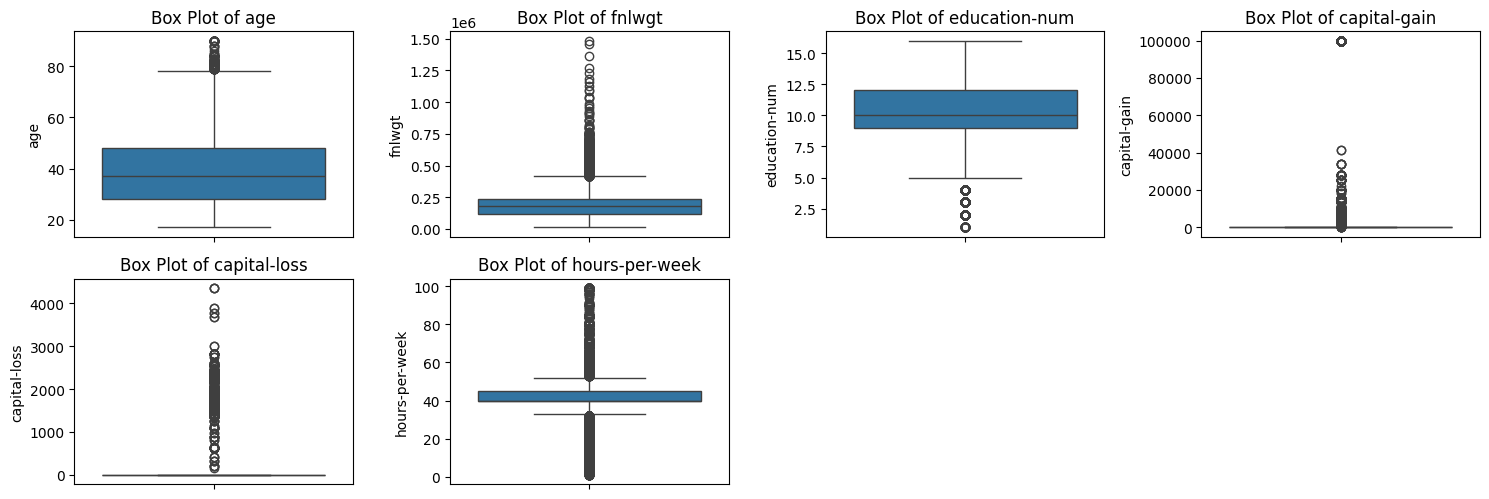

In [9]:
print(numerical_columns)
# Set the figure size
plt.figure(figsize=(15, 10))

# Plotting box plots for each numerical column
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)  # Adjust subplot dimensions as needed
    sns.boxplot(y=df[column])  # Using df_filtered to show post-filtering data
    plt.title(f'Box Plot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

Removing Outliers Useng Z-scores

In [10]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df))

# Set a lower threshold
threshold = 2  # Adjust to 2 or even lower if necessary

# Filter out rows that contain Z-scores above the threshold in any column
df_filtered = df[(z_scores < threshold).all(axis=1)]
df_filtered.shape

(18901, 15)

Plotting Box Plot After Outlier Removal

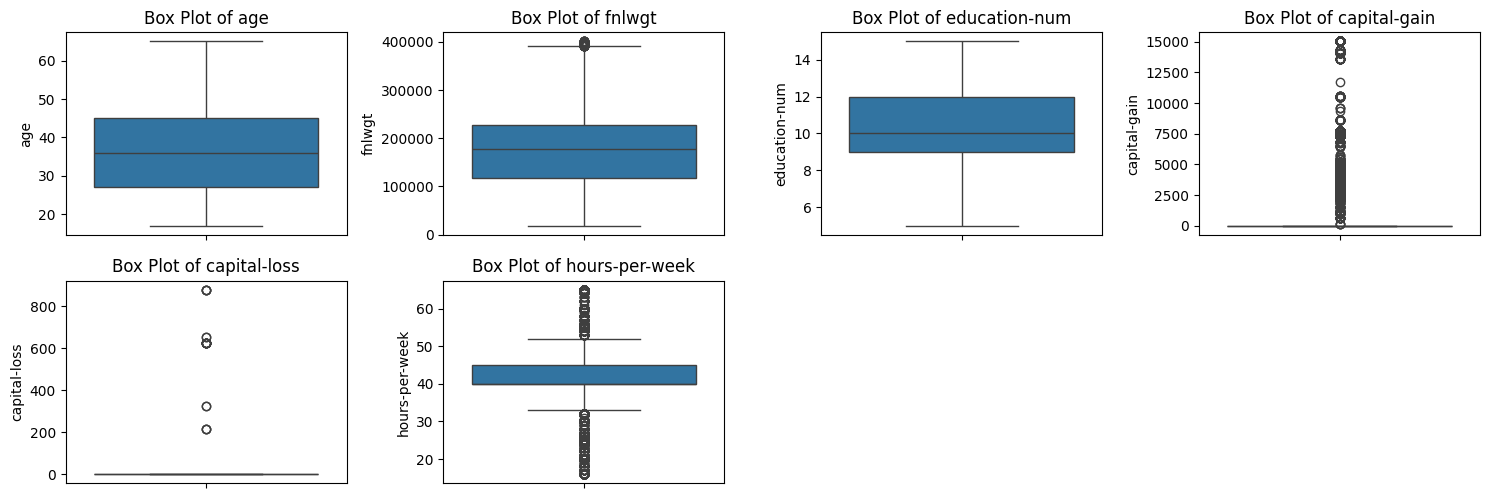

In [11]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Plotting box plots for each numerical column
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)  # Adjust subplot dimensions as needed
    sns.boxplot(y=df_filtered[column])  # Using df_filtered to show post-filtering data
    plt.title(f'Box Plot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [12]:
# Define features (X) and target variable (y)
X = df_filtered.drop(columns=['income'])  # All columns except 'income'
y = df_filtered['income']  # Target variable: 'income'
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
7,52,5,209642,11,9,2,3,0,4,1,0,0,45,38
8,31,3,45781,12,14,4,9,1,4,0,14084,0,50,38
9,42,3,159449,9,13,2,3,0,4,1,5178,0,40,38
12,23,3,122272,9,13,4,0,3,4,0,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,43,3,84661,8,11,2,11,0,4,1,0,0,45,38
32554,53,3,321865,12,14,2,3,0,4,1,0,0,40,38
32555,22,3,310152,15,10,4,10,1,4,1,0,0,40,38
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38


Drop Unnecessary Columns

In [13]:
X = X.drop(['capital-gain', 'capital-loss'], axis=1)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
2,38,3,215646,11,9,0,5,1,4,1,40,38
7,52,5,209642,11,9,2,3,0,4,1,45,38
8,31,3,45781,12,14,4,9,1,4,0,50,38
9,42,3,159449,9,13,2,3,0,4,1,40,38
12,23,3,122272,9,13,4,0,3,4,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...
32552,43,3,84661,8,11,2,11,0,4,1,45,38
32554,53,3,321865,12,14,2,3,0,4,1,40,38
32555,22,3,310152,15,10,4,10,1,4,1,40,38
32557,40,3,154374,11,9,2,6,0,4,1,40,38


Plotting Heatmap

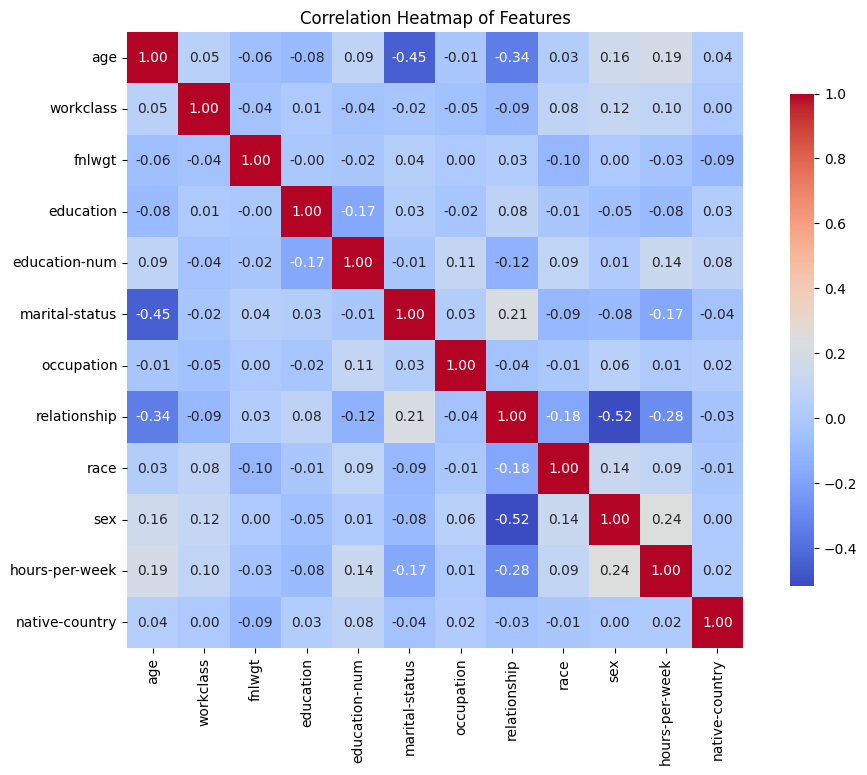

In [14]:
# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features')
plt.show()

Splitting the dataset into training and testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling the features

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Creating and training the K-Nearest Neighbor (KNN) model

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=20)  
knn_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred = knn_model.predict(X_test_scaled)

Evaluating the model

In [18]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.8214758000528961
Confusion Matrix:
 [[2667  229]
 [ 446  439]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      2896
           1       0.66      0.50      0.57       885

    accuracy                           0.82      3781
   macro avg       0.76      0.71      0.73      3781
weighted avg       0.81      0.82      0.81      3781



Visualizing the Confusion Matrix

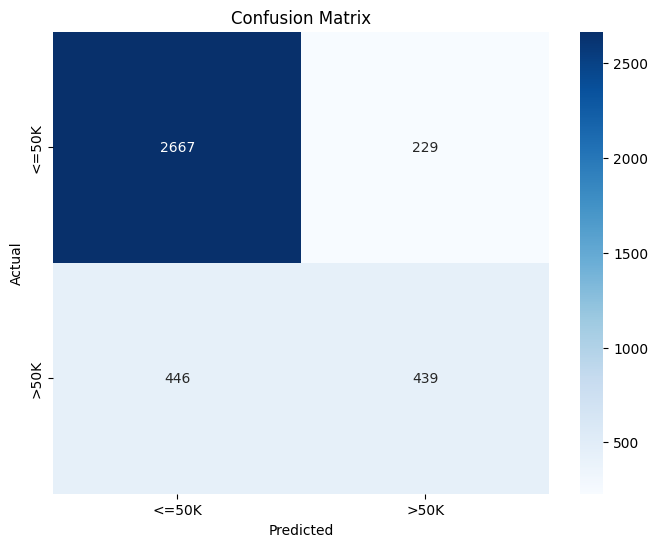

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()